In [ ]:
!pip install Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
#import packages
import pandas as pd
from prophet import *
import pandas as pd

**Prophet**



---


Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Why Prophet?
Accurate and fast: Prophet is used in many applications across Facebook for producing reliable forecasts for planning and goal setting. Facebook finds it to perform better than any other approach in the majority of cases. It fit models in Stan so that you get forecasts in just a few seconds.

Fully automatic: Get a reasonable forecast on messy data with no manual effort. Prophet is robust to outliers, missing data, and dramatic changes in your time series.

Tunable forecasts: The Prophet procedure includes many possibilities for users to tweak and adjust forecasts. You can use human-interpretable parameters to improve your forecast by adding your domain knowledge

Available in R or Python: Facebook has implemented the Prophet procedure in R and Python. Both of them share the same underlying Stan code for fitting. You can use whatever language you’re comfortable with to get forecasts.

References
https://facebook.github.io/prophet/
https://facebook.github.io/prophet/docs/
https://github.com/facebook/prophet
https://facebook.github.io/prophet/docs/quick_start.html

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/final_proj/dataset.xlsx")
df.head()
df["Year"] = pd.to_datetime(df["Year"])
df.head()

,Year,Indian Institute of Technology Madras,Indian Institute of Technology Kanpur,Indian Institute of Technology Guwahati,Indian Institute of Technology Hyderabad,Indian Institute of Technology (Indian School of Mines),Vellore Institute of Technology,Indian Institute of Technology Indore,Indian Institute of Technology (Banaras Hindu University) Varanasi,Institute of Chemical Technology,...,National Institute of Technology Uttarakhand,JSS Science and Technology University,Easwari Engineering College,National Engineering College,Sona College of Technology,C M R Institute of Technology,DIT University,Sree Vidyanikethan Engineering College,Sri Venkateswara College of Engineering and Technology,"Indian Institute of Engineering Science and Technology, Shibpur"
0,2016-01-01,89.41,81.07,74.62,77.22,NaN,74.40,72.00,74.39,NaN,...,NaN,NaN,NaN,NaN,58.97,NaN,NaN,NaN,NaN,NaN
1,2017-01-01,87.96,76.83,72.30,60.24,52.58,58.16,57.70,NaN,57.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,88.95,75.24,69.25,60.87,59.24,57.02,57.95,56.62,60.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.24
3,2019-01-01,89.05,77.57,70.87,63.92,58.18,56.46,59.35,59.80,59.73,...,NaN,34.43,30.31,31.85,35.79,31.36,NaN,31.70,31.3,NaN
4,2020-01-01,89.93,82.18,74.90,66.44,62.06,59.32,62.88,62.54,58.70,...,NaN,34.81,NaN,31.36,33.53,NaN,34.93,31.54,NaN,NaN


In [ ]:
colleges = df.columns[1:5]

# Create a dictionary to hold the models for each college
models = {}

for college in colleges:
    # Create a new DataFrame for the current college
    college_data = df[["Year",college]]
    college_data.columns = ['ds','y']
    
    # Create an instance of the Prophet model
    model = Prophet(yearly_seasonality=True)
    
    # Fit the model on the college data
    model.fit(college_data)
    
    # Add the model to the dictionary
    models[college] = model

# Create a DataFrame to hold future predictions
    future_data = model.make_future_dataframe(periods=365)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ucxjc9q/1ji8n8c2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ucxjc9q/cc_3ba7n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26449', 'data', 'file=/tmp/tmp2ucxjc9q/1ji8n8c2.json', 'init=/tmp/tmp2ucxjc9q/cc_3ba7n.json', 'output', 'file=/tmp/tmp2ucxjc9q/prophet_modelncd5yg1s/prophet_model-20230131054511.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:45:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:45:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

In [ ]:
forecasts = {}
for college, model in models.items():
    forecast = model.predict(future_data)
    forecast['college'] = college
    forecasts[college] = forecast

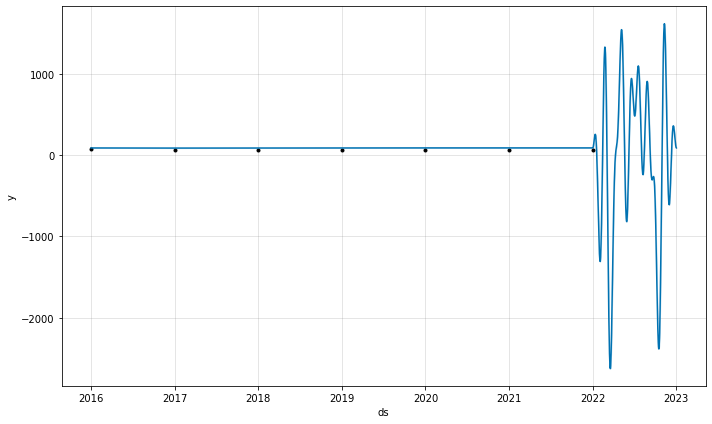

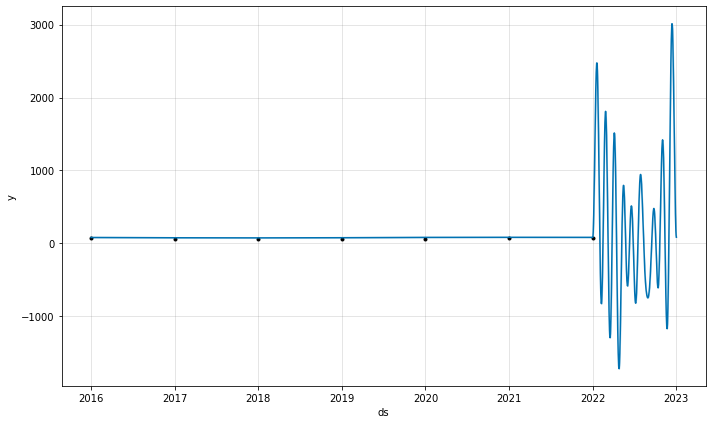

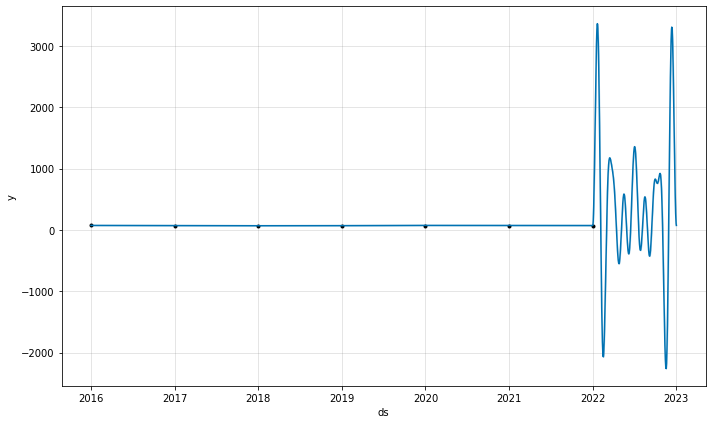

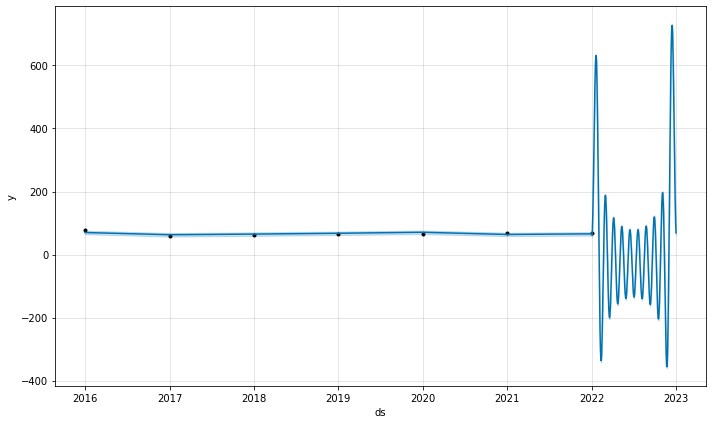

In [ ]:
# Plot the forecast
for college, forecast in forecasts.items():
    model.plot(forecast)

Prophet Model